TP1 : expériences préliminaires
===============================

In [10]:
import numpy as np
from numpy.random import Generator, PCG64
import matplotlib.pyplot as plt
import math
import time
from heateq import Exact, Simulateur
from time import process_time

In [2]:
seed = 213731490053398181466621250222036675538
rng = Generator(PCG64(seed))

In [3]:
# Permet d'obtenir un n-échantillon du vecteur aléatoire d'entrée X
def n_echantillon_X(n):
    return np.vstack(
        (
            rng.uniform(-math.pi, math.pi, (3, n)),
            rng.uniform(0.001, 0.009, (1, n)), 
            rng.uniform(-1., 1., (3, n))
        )
    )

In [4]:
# Simulateurs haute et basse fidélité
f = Simulateur(21, 100)
g = Simulateur(3, 20)

In [5]:
# Espérance exacte de la solution continue
mu_exact = Exact().mu
print(mu_exact)

# Espérance exacte de Y = f(X) (solution discrétisée, haute fidélité)
mu_Y_exact = f.mu
print(mu_Y_exact)

# Espérance exacte de Z = g(X) (solution discrétisée, basse fidélité)
mu_Z_exact = g.mu
print(mu_Z_exact)

41.98447216482205
41.916465294707976
33.03617206344313


# Expériences numériques

Déduire de `mu_exact`, `mu_Y_exact` et `mu_Z_exact` le biais de l'estimateur Monte Carlo classique de l'espérance de $f(\mathbf{X})$ et $g(\mathbf{X})$.

Lancer les simulateurs sur un nombre élevé de réalisations (par exemple 50000 ou 100000 si la mémoire de votre ordinateur le permet).

Les simulateurs `f` et `g` peuvent être évalués par exemple `f(X)` et `g(X)`.

Estimer $w=\dfrac{\mathbb{E}[\operatorname{cost}(g(\mathbf{X}))]}{\mathbb{E}[\operatorname{cost}(f(\mathbf{X}))]}$. Vous pouvez utiliser, par exemple, la fonction `time.process_time()`. Est-ce consistant avec la valeur attendue ?

In [7]:
biais_f = mu_Y_exact - mu_exact
biais_g = mu_Z_exact - mu_exact
print("Biais (f(X))", biais_f)
print("Biais (g(X))", biais_g)

Biais (f(X)) -0.06800687011407547
Biais (g(X)) -8.94830010137892


In [13]:
n = 100000
X = n_echantillon_X(n)

t1_start = process_time() 
sim_haute = f(X)
t1_stop = process_time()
t1 = t1_stop - t1_start

t2_start = process_time() 
sim_basse = g(X)
t2_stop = process_time()
t2 = t2_stop - t2_start

w = t2/t1
print("w", w)    # (3*20)/(21*100) = 0.02 environ
print("Basse", t2)
print("Haute", t1)

w 0.016535638422142205
Basse 0.022597794999999365
Haute 1.3666115829999992


Pour $n \in \{10; 20; 50; 100; 200; 500; 1000; 2000; 5000; 10000\}$, estimer `nr = 500` fois la moyenne empirique (Monte Carlo) de $Y=f(\mathbf{X})$, $Z=g(\mathbf{X})$ et estimer l'espéance, l'écart-type et la racine de l'erreur quadratique moyenne (REQM) des estimateurs.

Tracer l'espérance et l'écart-type des estimateurs haute et basse fidélité en fonction de $n$. Sur un autre graphe, tracer l'évolution de la REQM des estimateurs en fonction de $n$.

In [50]:
nr = 500
n_samples = [5, 10, 20, 50, 100, 200, 1000, 2000, 5000, 10000]

esperances_haute = []
esperances_basse = []
ecartype_haute = []
ecartype_basse = []
RMSE_haute = []
RMSE_basse = []

for n in n_samples:
    moy_emp_Y = []
    moy_emp_Z = []
    for i in range(nr):
        X = n_echantillon_X(n)
        Y = f(X)
        Z = g(X)
        moy_emp_Y.append(np.mean(Y))
        moy_emp_Z.append(np.mean(Z))
    
    esp_h = np.mean(moy_emp_Y)
    esp_b = np.mean(moy_emp_Z)
    et_h = np.std(moy_emp_Y)
    et_b = np.std(moy_emp_Z)
    rmse_h = np.sqrt(np.mean((esp_h - mu_exact) ** 2) + np.var(moy_emp_Y))
    rmse_b = np.sqrt(np.mean((esp_b - mu_exact) ** 2) + np.var(moy_emp_Z))
    
    esperances_haute.append(esp_h)
    esperances_basse.append(esp_b)
    ecartype_haute.append(et_h)
    ecartype_basse.append(et_b)
    RMSE_haute.append(rmse_h)
    RMSE_basse.append(rmse_b)

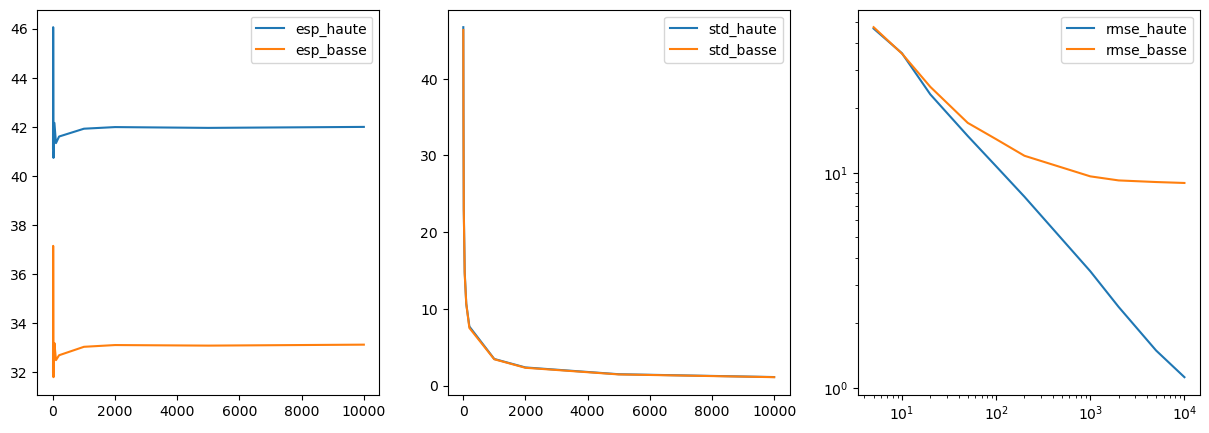

In [51]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(n_samples,esperances_haute, label="esp_haute")
axs[0].plot(n_samples,esperances_basse, label="esp_basse")
axs[1].plot(n_samples, ecartype_haute, label="std_haute")
axs[1].plot(n_samples, ecartype_basse, label="std_basse")
axs[2].plot(n_samples, RMSE_haute, label="rmse_haute")
axs[2].plot(n_samples, RMSE_basse, label="rmse_basse")
axs[2].set_xscale("log")
axs[2].set_yscale("log")
                       
for ax in axs: 
    ax.legend()
plt.show()

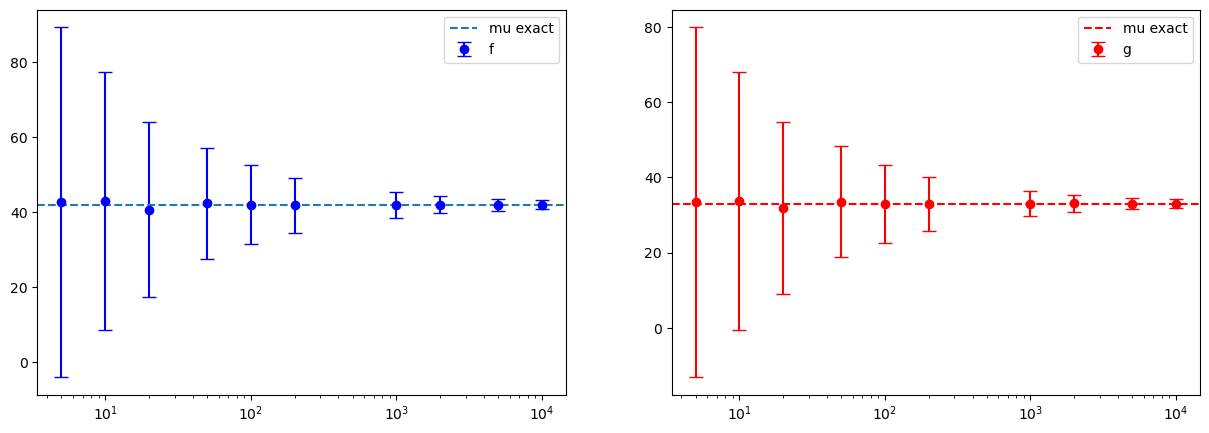

In [45]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].errorbar(n_samples, esperances_haute, yerr=ecartype_haute, fmt="o", color="b", capsize=5, label="f")
axs[1].errorbar(n_samples, esperances_basse, yerr=ecartype_basse, fmt="o", color="r", capsize=5, label="g")
axs[0].axhline(y=mu_Y_exact, linestyle='--', label="mu exact")
axs[1].axhline(y=mu_Z_exact, linestyle='--', label="mu exact", color="r")

for ax in axs:
    ax.set_xscale("log")
    ax.legend()

plt.show()